Using the Wilson loop method, numerically calculate the Berry
phase of the lower band, and plot it as a function of τ . In the numerical calculation, take the number of k points and the number of τ points greater than or equal to 50.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Converting the example from class into Python as a starting point

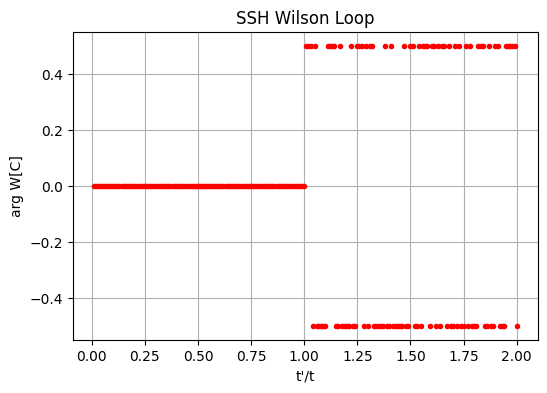

In [ ]:
t = 1.0
Nk = 200

# eigenvectors
evecs = np.zeros((Nk, Nk+1, 2), dtype=complex)

# compute eigenvectors of lower band for each (j,i)
for j in range(Nk):  
    tp = 2.0 * (j + 1) / Nk
    for i in range(Nk):  
        k = -np.pi + 2.0 * np.pi * (i + 1) / Nk
        off = t + tp * (np.cos(k) - 1j*np.sin(k)) # define off-diagonals of hamiltonian seperately
        h = np.array([[0.0, off],
                      [np.conj(off), 0.0]], dtype=complex)
        eval, evec = np.linalg.eigh(h)         
        idx = np.argsort(np.real(eval))     # sort based on the real part of eigenvalues
        evec_sorted = evec[:, idx]
        evecs[j, i, :] = evec_sorted[:, 0]
    # ev[[j, Nk + 1]] = ev[[j, 1]] - this was the original line from the class example, Python indexes differently 
    evecs[j, Nk, :] = evecs[j, 0, :]

# need theta for each j
theta = np.zeros((Nk, 2), dtype=float)
for j in range(Nk):
    tp = 2.0 * (j + 1) / Nk
    W = 1.0 
    for i in range(Nk):
        num = np.vdot(evecs[j, i+1, :], evecs[j, i, :])
        den = np.linalg.norm(evecs[j, i+1, :]) * np.linalg.norm(evecs[j, i, :])
        F = num / den
        W = F * W
    theta[j, 0] = tp
    theta[j, 1] = np.angle(W) / (2.0 * np.pi)

# plot 
plt.figure(figsize=(6,4))
plt.plot(theta[:,0], theta[:,1], ".", color="red")
plt.xlabel("t'/t")
plt.ylabel("arg W[C]")
plt.title("SSH Wilson Loop")
plt.grid()
plt.show()

Now completing the homework problem

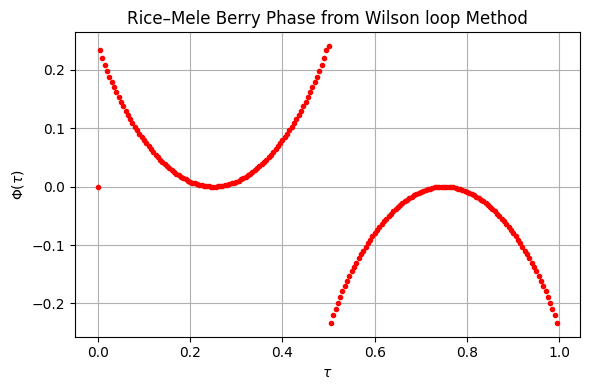

In [10]:
# I set the given parameters and hamiltonian for the given Rice-Mele model

a = 1.0          # lattice constant
T = 1.0          
Nk = 200         # number of k points greater than or equal to 50
Ntau = 200       # number of tau points greater than or equal to 50

def Hamiltonian(tau, k):
    t  = 1
    tp = np.cos(2*np.pi*tau/T)
    V1 = np.sin(2*np.pi*tau/T)
    V2 = -np.sin(2*np.pi*tau/T)
    off_diag = t + tp*np.exp(-1j*k*a)  
    return np.array([[V1,  off_diag],
                     [np.conj(off_diag), V2]], dtype=complex)

# make artificial linspace for k values given by the bounds of berry phase in the problem
kmin, kmax = -np.pi/a, np.pi/a
k_grid = np.linspace(kmin, kmax, Nk, endpoint=False)
 
# constrain tau to 0 \leq tau < T (not sure if this is necessary here)
tau_grid = np.linspace(0.0, T, Ntau, endpoint=False)

# initialize space for all the berry phases based on the number of tau points
phi_vals = np.zeros(Ntau)

for j, tau in enumerate(tau_grid):
    # lower-band eigenvectors at this tau
    evecs = np.zeros((Nk+1, 2), dtype=complex) 

    for i, k in enumerate(k_grid):
        evals, evec = np.linalg.eigh(Hamiltonian(tau, k))   
        idx = np.argmin(np.real(evals))             
        evecs[i, :] = evec[:, idx]

    evecs[Nk, :] = evecs[0, :]

    W = 1.0
    for i in range(Nk):
        num = np.vdot(evecs[i+1, :], evecs[i, :])  
        den = np.linalg.norm(evecs[i+1, :]) * np.linalg.norm(evecs[i, :])
        W *= (num / den)

    phi_vals[j] = np.angle(W) / (2.0*np.pi)

# Plot 
plt.figure(figsize=(6,4))
plt.plot(tau_grid, phi_vals, ".", color="red")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\Phi(\tau)$")
plt.title("Rice–Mele Berry Phase from Wilson loop Method")
plt.grid(True)
plt.tight_layout()
plt.show()
